<a href="https://colab.research.google.com/github/ykjoy/ML/blob/main/cnn_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN 실습

## 패션 Minst 데이터 예측

In [1]:
from tensorflow import keras
# 1. 데이터 입력 준비(패션 Minst)
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
test_scaled = test_input/255.0
train_scaled = train_scaled.reshape(-1, 28,28,1)  #-1은 데이터 수, 뒤의 (28,28,1)이 각 그림의 크기임
test_scaled = test_scaled.reshape(-1, 28,28, 1)

# 2. 신경망 구성
convol = keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (28,28,1))
# 2차원 모양을 그대로 유지, 흑백이라 1
pooling = keras.layers.MaxPooling2D(2)
flatten = keras.layers.Flatten()
dense = keras.layers.Dense(10, activation = 'softmax')  # 출력층 -   밀집층으로 이전과 동일
model = keras.Sequential([convol, pooling, flatten,dense]) #CNN 또는 dense층을 상황에 따라서 추가하면 됨.
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# 3. 신경망 학습
model.fit(train_scaled, train_target, epochs = 7, validation_data = (test_scaled,test_target))
#4. 성능평가
model.evaluate(test_scaled, test_target)

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/7
1875/1875 [==============================] - 18s 3ms/step - loss: 0.4337 - accuracy: 0.8485 - val_loss: 0.3621 - val_accuracy: 0.8734
Epoch 2/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3127 - accuracy: 0.8917 - val_loss: 0.3108 - val_accuracy: 0.8930
Epoch 3/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2830 - accuracy: 0.9009 - val_loss: 0.3132 - val_accuracy: 0.8904
Epoch 4/7
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2641 - accuracy: 0.9078 - val_loss: 0.2899 - val_accuracy: 0.8988
Epoch 5/7
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2501 - accuracy: 0.9133 - val_loss: 0.2926 - val_accuracy: 0.8980
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2392 - accuracy: 0.9175 - val_loss: 0.3004 - val_accuracy: 0.8943
Epoch 7/7
313/313 [==============================] - 1s 3ms/step - loss: 0.271

[0.2713024318218231, 0.9052000045776367]

# RNN 실습   


## 주가 데이터 불러오기

In [5]:
from google.colab import files

stock_file = files.upload() #화일을 코랩에 업로드

Saving 삼성전자_20200101.csv to 삼성전자_20200101.csv


In [7]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(stock_file["삼성전자_20200101.csv"])) #데이터프레임으로 불러오기, null포함
print(df.head())
df.info()

         Date     Open     High      Low    Close     Adj Close    Volume
0  2020-01-02  55500.0  56000.0  55000.0  55200.0  50037.410156  12993228
1  2020-01-03  56000.0  56600.0  54900.0  55500.0  50309.359375  15422255
2  2020-01-06  54900.0  55600.0  54600.0  55500.0  50309.359375  10278951
3  2020-01-07  55700.0  56400.0  55600.0  55800.0  50581.296875  10009778
4  2020-01-08  56200.0  57400.0  55900.0  56800.0  51487.773438  23501171
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       930 non-null    object 
 1   Open       930 non-null    float64
 2   High       930 non-null    float64
 3   Low        930 non-null    float64
 4   Close      930 non-null    float64
 5   Adj Close  930 non-null    float64
 6   Volume     930 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 51.0+ KB


In [8]:
df = df.dropna(axis =0)  #결측값 있다면 행 전체 제거
df.shape

(930, 7)

In [ ]:
## 구글 드라이브를 이용하는 경우
## from google.colab import drive
## drive.mount('/content/drive')

## df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/삼성전자.csv")

## 데이터 전처리

In [9]:
df_x = df[['Open','High','Low', 'Volume', 'Adj Close']] #독립변수로 사용할 변수만 모았음/또는 df.drop([삭제할것, ], axis =1)
df_y = df[['Adj Close']]
print(df_x.head(5))

      Open     High      Low    Volume     Adj Close
0  55500.0  56000.0  55000.0  12993228  50037.410156
1  56000.0  56600.0  54900.0  15422255  50309.359375
2  54900.0  55600.0  54600.0  10278951  50309.359375
3  55700.0  56400.0  55600.0  10009778  50581.296875
4  56200.0  57400.0  55900.0  23501171  51487.773438


In [12]:
# scikit-learn의 MinMaxScaler로 독립변수를 0~1로 변환: 값-최소값/(최대값-최소값)
# 거래량은 단위가 다름

from sklearn.preprocessing import MinMaxScaler  #(값-최소)/(최대-최소)

scaler = MinMaxScaler()
scale_x = scaler.fit_transform(df_x)
scale_y = scaler.fit_transform(df_y)  #모든 행, 마지막 열 종가

In [14]:
# 입력 10일치의 [시가, 고가, 저가, 거래량, 종가] 를 2차원 배열로 구성
# 타겟  다음날의 [종가]
import numpy as np

# 데이터 정제  과거 *일, 다음날 종가
x = []
y= []

window_size = 10 # 과거 10일일때

print(len(scale_y))
for i in range(len(scale_y)-window_size): # 마지막 10개 종속변수가 없음.
  current_x = scale_x[i:i+window_size]
  current_y = scale_y[[i+window_size]]
  x.append(current_x)
  y.append(current_y)

x = np.array(x)
y = np.array(y)
print(x[0],"->",y[0])
print(x[1],"->",y[1])

930
[[0.61461794 0.5785124  0.61452514 0.14387973 0.24103566]
 [0.62015504 0.58471074 0.61340782 0.17077741 0.24672956]
 [0.60797342 0.57438017 0.61005587 0.11382334 0.24672956]
 [0.61683278 0.58264463 0.62122905 0.11084267 0.25242321]
 [0.62236988 0.59297521 0.62458101 0.2602388  0.27140243]
 [0.64673311 0.6053719  0.64134078 0.26689845 0.30556484]
 [0.65116279 0.61673554 0.65139665 0.17717692 0.3226462 ]
 [0.66002215 0.61983471 0.6603352  0.12578474 0.33213581]
 [0.66888151 0.63016529 0.66927374 0.18721084 0.33213581]
 [0.65891473 0.61570248 0.65810056 0.15836046 0.31315659]] -> [[0.3454213]]
[[0.62015504 0.58471074 0.61340782 0.17077741 0.24672956]
 [0.60797342 0.57438017 0.61005587 0.11382334 0.24672956]
 [0.61683278 0.58264463 0.62122905 0.11084267 0.25242321]
 [0.62236988 0.59297521 0.62458101 0.2602388  0.27140243]
 [0.64673311 0.6053719  0.64134078 0.26689845 0.30556484]
 [0.65116279 0.61673554 0.65139665 0.17717692 0.3226462 ]
 [0.66002215 0.61983471 0.6603352  0.12578474 0.33

## LSTM 이용 주가 예측


In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.3, shuffle  = False) # 시계열데이터는 섞으면 안됨.

In [16]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.LSTM(10, return_sequences = True, input_shape = (window_size, 5)))
model.add(keras.layers.LSTM(10))
model.add(keras.layers.Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 10)            640       
                                                                 
 lstm_1 (LSTM)               (None, 10)                840       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 1491 (5.82 KB)
Trainable params: 1491 (5.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, epochs = 20)
pred_y = model.predict(x_test)
print("MSE: ",model.evaluate(x_test,y_test))

Epoch 1/20
21/21 [==============================] - 6s 21ms/step - loss: 0.2753
Epoch 2/20
21/21 [==============================] - 0s 14ms/step - loss: 0.0485
Epoch 3/20
21/21 [==============================] - 0s 13ms/step - loss: 0.0311
Epoch 4/20
21/21 [==============================] - 0s 12ms/step - loss: 0.0242
Epoch 5/20
21/21 [==============================] - 0s 12ms/step - loss: 0.0183
Epoch 6/20
21/21 [==============================] - 0s 12ms/step - loss: 0.0122
Epoch 7/20
21/21 [==============================] - 0s 13ms/step - loss: 0.0066
Epoch 8/20
21/21 [==============================] - 0s 12ms/step - loss: 0.0033
Epoch 9/20
21/21 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 10/20
21/21 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 11/20
21/21 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 12/20
21/21 [==============================] - 0s 13ms/step - loss: 0.0021
Epoch 13/20
21/21 [==================

In [18]:
pred_y.shape

(276, 1)

In [19]:
print(pred_y[0])

[0.4193722]


In [20]:
pred_y = scaler.inverse_transform(pred_y)  #원래 단위로 inverse transform
print(pred_y[0])


[58555.035]


In [35]:
y_train.shape

(644, 1, 1)

In [39]:
result_df =  df.loc[654:,['Date', 'Adj Close']] #테스트데이터가 654부터 시작됨.
result_df['Pred Close'] = pred_y
result_df.head()

,Date,Adj Close,Pred Close
654,2022-08-26,58586.953125,58555.035156
655,2022-08-29,57219.921875,58474.804688
656,2022-08-30,57415.214844,58285.906250
657,2022-08-31,58294.015625,58045.839844
658,2022-09-01,57024.632813,57897.234375


## 그래프로 그리기

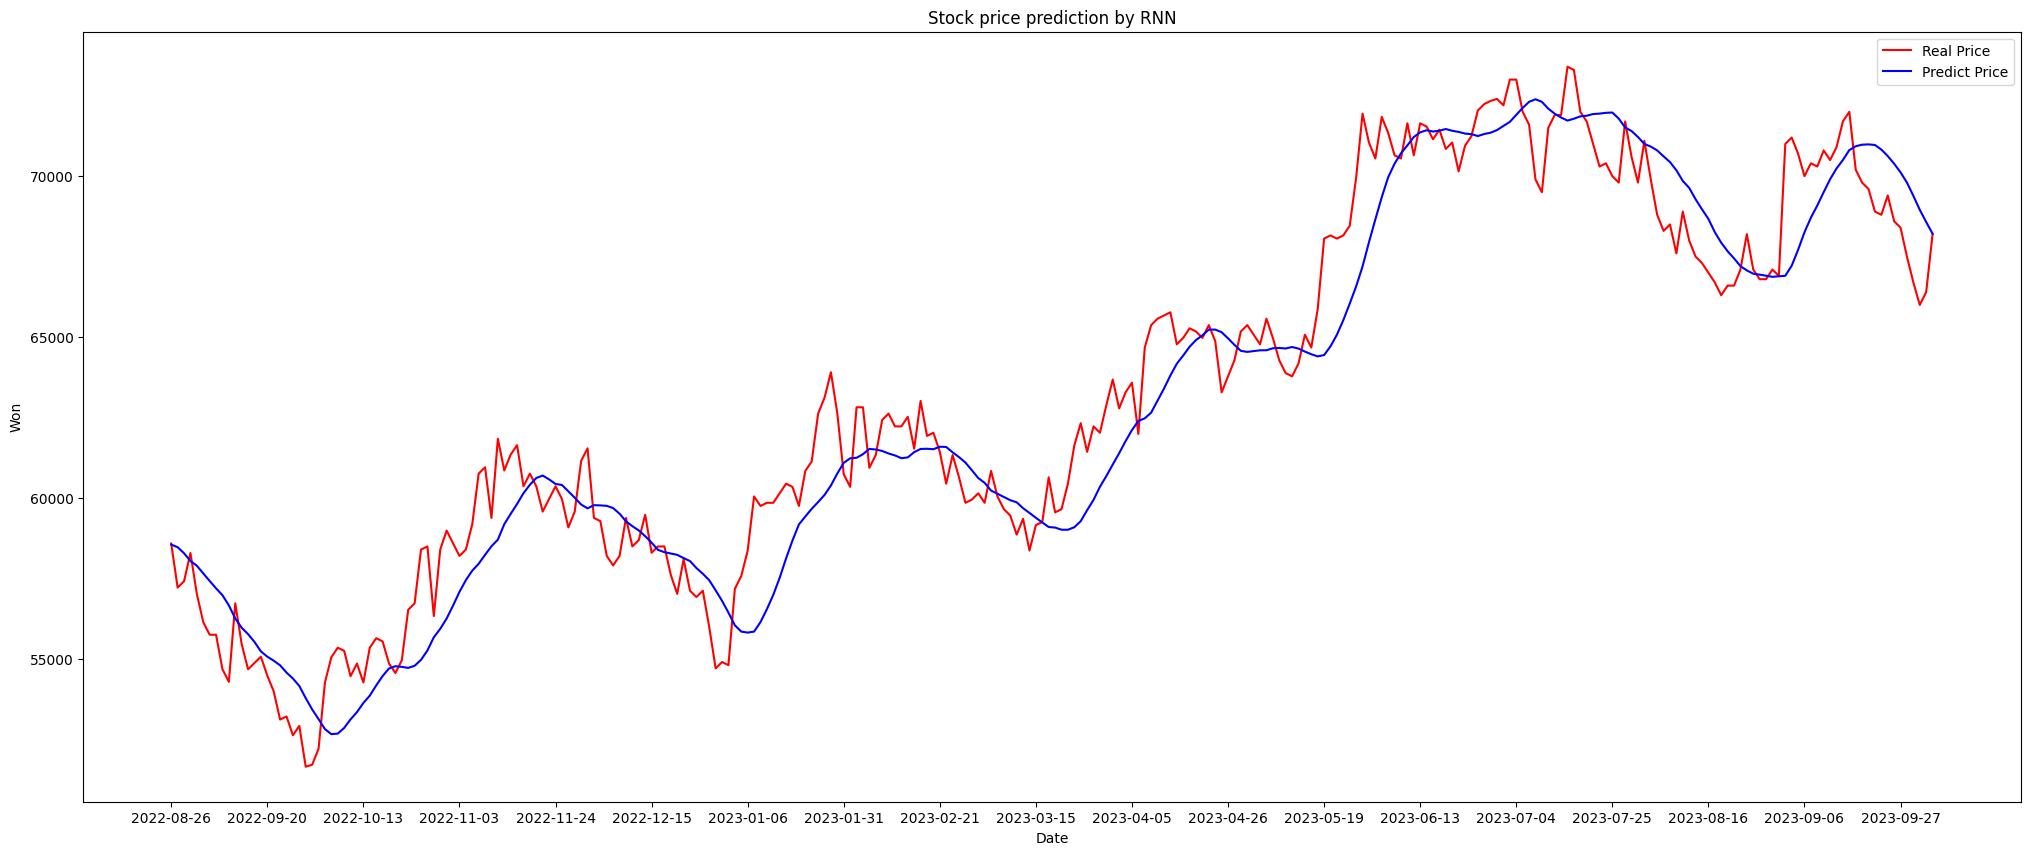

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))   #크기 늘려줌
plt.plot(result_df['Date'], result_df['Adj Close'], c='r')
plt.plot(result_df['Date'], result_df['Pred Close'], c='b')
plt.title("Stock price prediction by RNN")
plt.xlabel('Date')
plt.ylabel("Won")

plt.legend(['Real Price', 'Predict Price'])  #계열 표시
plt.xticks(np.arange(0, len(result_df['Date']), 15)) #X간격 10일에 한번씩만 찍기

plt.show()